In [1]:
import os
import pymysql
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
host = 'localhost'
port = '3306'
user = 'root'
password = 'root'
database = 'yelp_db'

conn = pymysql.connect( host=host, port=int(port),
    user=user, passwd=password, db=database, charset='utf8mb4')

In [4]:
conn.open

True

In [5]:
%%time
df = pd.read_sql_query(
    "SELECT * FROM reviewCategories WHERE state in ('AZ', 'WI', 'NV', 'NC', 'PA', 'OH', 'IL', 'SC', 'NY');",
    conn)

CPU times: user 47.5 s, sys: 1.78 s, total: 49.3 s
Wall time: 49.3 s


In [6]:
df.shape

(923002, 19)

In [7]:
df.state.value_counts()

AZ    381687
NV    336452
NC     61057
OH     54085
PA     53649
WI     25550
IL      8947
SC      1560
NY        15
Name: state, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923002 entries, 0 to 923001
Data columns (total 19 columns):
business_id    923002 non-null object
name           923002 non-null object
review_id      923002 non-null object
stars          923002 non-null int64
date           923002 non-null datetime64[ns]
text           923002 non-null object
useful         923002 non-null int64
funny          923002 non-null int64
cool           923002 non-null int64
city           923002 non-null object
state          923002 non-null object
vegFriendly    923002 non-null float64
Vegan          923002 non-null float64
Vegetarian     923002 non-null float64
Thai           923002 non-null float64
Italian        923002 non-null float64
Indian         923002 non-null float64
Chinese        923002 non-null float64
Mexican        923002 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(4), object(6)
memory usage: 133.8+ MB


In [9]:
df['state'].unique()

array(['AZ', 'WI', 'NV', 'NC', 'PA', 'OH', 'IL', 'SC', 'NY'], dtype=object)

In [10]:
df["Text_length"] = df["text"].apply(len)

In [11]:
# Completed 8.9.18 11:40am
# ("Mexican", "Chinese", "Indian", "Italian", "Thai", "Vegetarian", "Vegan")

# df.to_pickle("newRev_VegCols_US.pkl")

In [12]:
# df['useful'].value_counts()

#### Plot Cuisine Distributions

In [13]:
# Start off with labeled Cuisines (will have to capture unlabeled: Other)

cuisines = ["Mexican", "Chinese", "Indian", "Italian", "Thai"]

ht = np.zeros((1,len(cuisines)))

for i, c in enumerate(cuisines):
    ht[0, i] = df[c].value_counts()[1] / df.shape[0]

In [14]:
cuisines.append("Other")

with_other = np.append(ht, 1-ht.sum())

In [15]:
print("Did all Cuisine Categories add to 1? ", with_other.sum() == 1)

Did all Cuisine Categories add to 1?  True


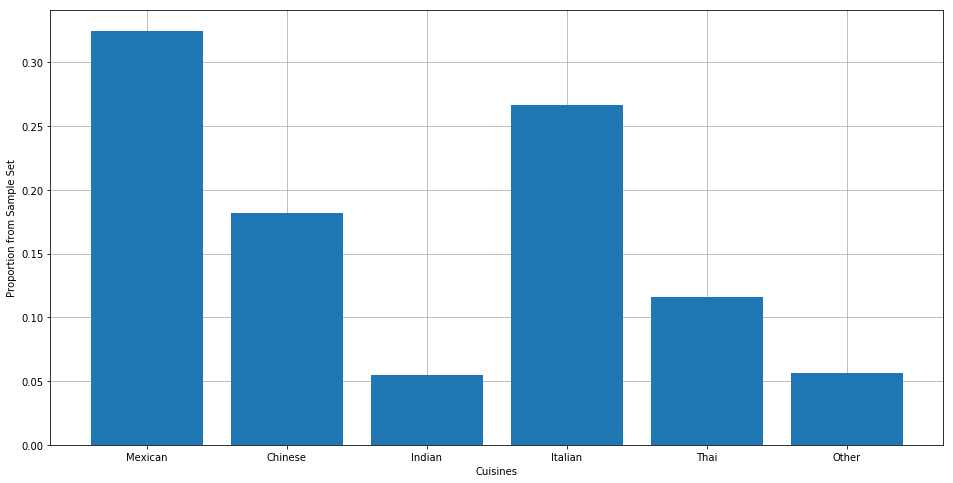

In [16]:
plt.figure(figsize=(16,8))
plt.grid(True, zorder=0)
plt.bar(range(len(cuisines)), height=with_other, tick_label = cuisines, zorder=2)
plt.ylabel("Proportion from Sample Set")
plt.xlabel("Cuisines");

In [17]:
veg_mask = df.vegFriendly == 1

print("Percent of Vegan/Vgtrn Friendly reviews: ", (df[veg_mask].shape[0] / df.shape[0]) * 100)

Percent of Vegan/Vgtrn Friendly reviews:  12.910697918314371


In [18]:
th_mask = df.Thai == 1

In [19]:
veg_mask = df.vegFriendly == 1

In [20]:
%%time
veg_df = df[veg_mask]

CPU times: user 28 ms, sys: 4 ms, total: 32 ms
Wall time: 33.9 ms


In [21]:
veg_df.shape

(119166, 20)

In [22]:
veg_df.head()

,business_id,name,review_id,stars,date,text,useful,funny,cool,city,state,vegFriendly,Vegan,Vegetarian,Thai,Italian,Indian,Chinese,Mexican,Text_length
2,-8QlV3b_9H4BAh6LgMIr1g,Nandini Indian Cuisine,--c6GUtseZhMHA0rSfnN8w,5,2015-09-30,"This was our second, but certainly not our las...",1,0,1,Tempe,AZ,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,304
3,-8QlV3b_9H4BAh6LgMIr1g,Nandini Indian Cuisine,--c6GUtseZhMHA0rSfnN8w,5,2015-09-30,"This was our second, but certainly not our las...",1,0,1,Tempe,AZ,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,304
14,82mWTnfbGDE1jJ2NDMxfNw,Pita Jungle,-02-MrBXqRiRt7G7msKswQ,4,2010-04-07,So I lied... I somehow ended up at this Pita J...,2,1,3,Mesa,AZ,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1697
17,aY8xiGLpTjIkz6FAJbCy7A,Double Wide Grill,-0GY7W_nLGuHy8CwdUG7tA,3,2016-06-01,I came here a number of times years ago and re...,1,0,0,Pittsburgh,PA,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,883
60,5DDumAHRKumv3gZiPKW6iw,Nami,-4rN2jtNETXhyYHcsDUmaQ,4,2015-04-26,Always a line out the door for Nami. The food ...,0,0,0,Phoenix,AZ,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,351


In [23]:
# Start off with labeled Cuisines (will have to capture unlabeled: Other)

cuisines = ["Mexican", "Chinese", "Indian", "Italian", "Thai"]

vht = np.zeros((1, len(cuisines)))
tot = np.zeros((1, len(cuisines)))

for i, c in enumerate(cuisines):
    vht[0, i] = veg_df[c].value_counts()[1] / veg_df.shape[0]  # from Sub-sample
    tot[0, i] = veg_df[c].value_counts()[1] / df.shape[0]      # from total sample

In [24]:
cuisines.append("Other")

vht_other = np.append(vht, 1-vht.sum())
tot_other = np.append(tot, 1-tot.sum())

In [25]:
vht_other * 100

array([13.86469295,  7.2822785 , 13.87476294,  4.99303493, 13.98049779,
       46.00473289])

In [26]:
print("Cuisine Categories add to 1 for VegFrdly sub-sample? ", vht_other.sum() == 1)

Cuisine Categories add to 1 for VegFrdly sub-sample?  True


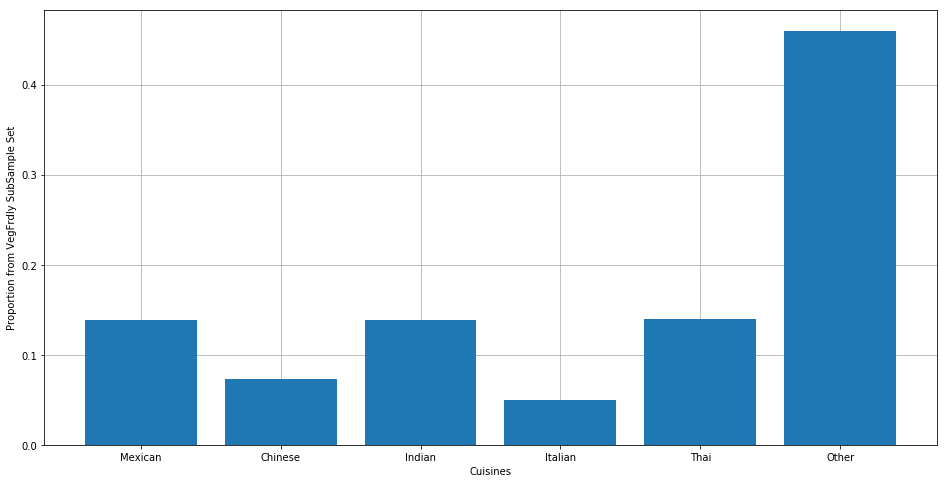

In [27]:
plt.figure(figsize=(16,8))
plt.grid(True, zorder=0)
plt.bar(range(len(cuisines)), height=vht_other, tick_label = cuisines, zorder=2)
plt.ylabel("Proportion from VegFrdly SubSample Set")
plt.xlabel("Cuisines");

In [28]:
print("Cuisine Categories add to 1 for VegFrdly full sample? ", tot_other.sum() == 1)

Cuisine Categories add to 1 for VegFrdly full sample?  True


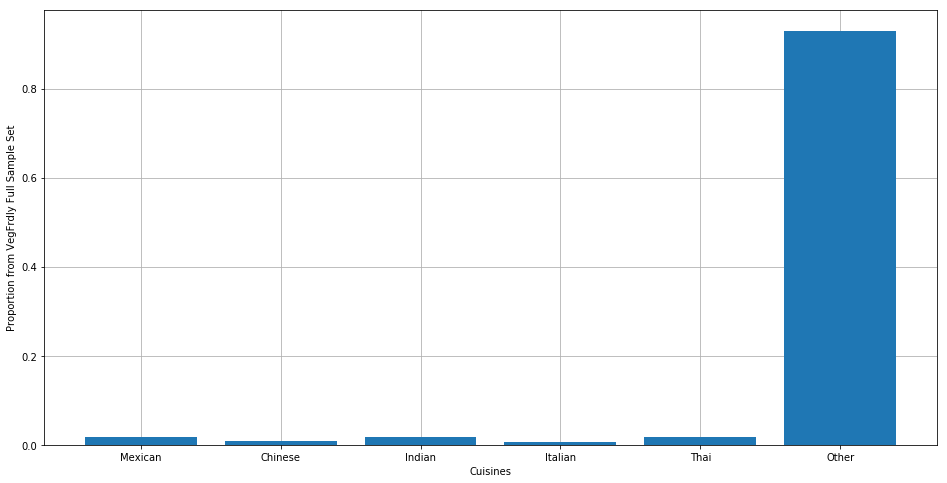

In [29]:
plt.figure(figsize=(16,8))
plt.grid(True, zorder=0)
plt.bar(range(len(cuisines)), height=tot_other, tick_label = cuisines, zorder=2)
plt.ylabel("Proportion from VegFrdly Full Sample Set")
plt.xlabel("Cuisines");

## Don't forget to CLOSE connection

In [30]:
conn.close()